In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering



In [108]:
import os

In [109]:
print(os.listdir("downloads"))

['(1-3)Phishing Websites Detection.pdf', '1.pdf', '1111.docx', '2021-11-29-12-40-33.mp4', '2021-11-29-14-52-43.mp4', '2021-11-29-15-01-29.mp4', '2644595.jpg', '2nd vaccine dose.pdf', '2semesterfee receipt.pdf', '3-Figure1-1.png', 'aadharcard.pdf', 'Abhishek Resume.pdf', 'Adesh big_data practical.docx', 'algorithm of report.html', 'algorithm of report_files', 'Anaconda3-2022.05-Windows-x86_64.exe', 'android-studio-2020.3.1.25-windows.exe', 'archive (1).zip', 'archive (2).zip', 'archive (3).zip', 'archive (4).zip', 'archive.zip', 'Basic_Building_Series_Real_Analysis_Unit_1_for_CSIR_21_with_anno.pdf', 'BED+Practice+Test_round+3%264_Java.pdf', 'bill2.txt', 'certificate.pdf', 'ChatBots.ppt', 'ChromeSetup.exe', 'code.png', 'codeblocks-20.03mingw-setup.exe', 'cuda_11.7.0_516.01_windows.exe', 'cudnn-windows-x86_64-8.4.1.50_cuda11.6-archive.zip', 'desktop.ini', 'DiscordSetup.exe', 'Docker Desktop Installer.exe', 'DSC_User_Manual.pdf', 'DT20222970322_Application.pdf', 'er.jpg', 'Exam fee receipt

In [110]:
mcdonald_df = pd.read_csv('Downloads/mcdonalds.csv') 

In [111]:
mcdonald_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [112]:
mcdonald_df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [113]:
mcdonald_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [114]:
mcdonald_df[mcdonald_df.columns[:]] =  mcdonald_df[mcdonald_df.columns[:]].replace("Yes",1,regex=True)
mcdonald_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,1,No,1,No,1,1,No,1,No,No,-3,61,Every three months,Female
1,1,1,No,1,1,1,1,1,1,No,No,2,51,Every three months,Female
2,No,1,1,1,1,1,No,1,1,1,No,1,62,Every three months,Female
3,1,1,No,1,1,1,1,1,No,No,1,4,69,Once a week,Female
4,No,1,No,1,1,1,1,No,No,1,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,1,No,1,1,No,No,No,1,No,1,I hate it!-5,47,Once a year,Male
1449,1,1,No,1,No,No,1,1,No,1,No,2,36,Once a week,Female
1450,1,1,No,1,No,1,No,1,1,No,No,3,52,Once a month,Female
1451,1,1,No,No,No,1,1,1,No,1,No,4,41,Every three months,Male


In [115]:
mcdonald_df[mcdonald_df.columns[:]] =  mcdonald_df[mcdonald_df.columns[:]].replace("No",0,regex=True)
mcdonald_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male


In [116]:
mcdonald_df[mcdonald_df.columns[:]] =  mcdonald_df[mcdonald_df.columns[:]].replace("Male",1,regex=True)
mcdonald_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,1


In [117]:
mcdonald_df[mcdonald_df.columns[:]] =  mcdonald_df[mcdonald_df.columns[:]].replace("Female",0,regex=True)
mcdonald_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,1


In [118]:
mcdonald_df[mcdonald_df.columns[:]] =  mcdonald_df[mcdonald_df.columns[:]].replace("I hate it!-5",-5,regex=True)
mcdonald_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,1


In [136]:
mcdonald_df[mcdonald_df.columns[:]] =  mcdonald_df[mcdonald_df.columns[:]].replace("I love it!+5",5,regex=True)
mcdonald_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,Visitfrequency
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,18
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,18
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,18
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0,52
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,0,52
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0,12
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1,18


In [137]:
def convert(x):
    if x == 'Never':
        return 0
    if x =='Once a year':
        return 1
    if x =='Once a week':
        return 52
    if x == 'More than once a week':
        return 110
    if x == 'Every three months':
        return 18
    if x == 'Once a month':
        return 12

In [138]:
mcdonald_df['Visitfrequency'] = mcdonald_df['VisitFrequency'].apply(convert)
mcdonald_df

KeyError: 'VisitFrequency'

In [172]:
def conver2(y):
    if y == "I love it!+5":
        return 5

In [177]:
mcdonald_df['like'] = mcdonald_df['Like'].apply(conver2)
mcdonald_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,like
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,NaN
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,NaN
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,NaN
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0,NaN
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,NaN
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,0,NaN
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0,NaN
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1,NaN


In [139]:
del mcdonald_df['VisitFrequency']
mcdonald_df

KeyError: 'VisitFrequency'

In [140]:
print(pd.isnull(mcdonald_df).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
Gender            0
Visitfrequency    0
dtype: int64


In [141]:
mcdonald_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,Visitfrequency
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,18
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,18
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,18
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0,52
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,0,52
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0,12
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1,18


In [142]:
mcdonald_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
yummy,1453.0,NaN,NaN,NaN,0.55265,0.497391,0.0,0.0,1.0,1.0,1.0
convenient,1453.0,NaN,NaN,NaN,0.907777,0.28944,0.0,1.0,1.0,1.0,1.0
spicy,1453.0,NaN,NaN,NaN,0.093599,0.291371,0.0,0.0,0.0,0.0,1.0
fattening,1453.0,NaN,NaN,NaN,0.867171,0.339506,0.0,1.0,1.0,1.0,1.0
greasy,1453.0,NaN,NaN,NaN,0.526497,0.499469,0.0,0.0,1.0,1.0,1.0
fast,1453.0,NaN,NaN,NaN,0.900206,0.299828,0.0,1.0,1.0,1.0,1.0
cheap,1453.0,NaN,NaN,NaN,0.598761,0.490318,0.0,0.0,1.0,1.0,1.0
tasty,1453.0,NaN,NaN,NaN,0.644184,0.478925,0.0,0.0,1.0,1.0,1.0
expensive,1453.0,NaN,NaN,NaN,0.35788,0.479542,0.0,0.0,0.0,1.0,1.0
healthy,1453.0,NaN,NaN,NaN,0.198899,0.399309,0.0,0.0,0.0,0.0,1.0


In [143]:
mcdonald_df.count()

yummy             1453
convenient        1453
spicy             1453
fattening         1453
greasy            1453
fast              1453
cheap             1453
tasty             1453
expensive         1453
healthy           1453
disgusting        1453
Like              1453
Age               1453
Gender            1453
Visitfrequency    1453
dtype: int64

In [144]:
print(mcdonald_df['convenient'].unique())

[1 0]


In [145]:
print(mcdonald_df['spicy'].unique())

[0 1]


In [146]:
print(mcdonald_df['fattening'].unique())

[1 0]


In [147]:
print(mcdonald_df['greasy'].unique())

[0 1]


In [148]:
print(mcdonald_df['cheap'].unique())

[1 0]


In [149]:
print(mcdonald_df['Like'].unique())

['-3' '2' '1' '4' 'I love it!+5' -5 '-2' '3' '0' '-4' '-1']


In [150]:
print(mcdonald_df['Age'].unique())

[61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]


In [151]:
print(mcdonald_df['Visitfrequency'].unique())

[ 18  52  12   1 110   0]


In [152]:
mcdonald_df.VisitFfrequency.value_counts()

AttributeError: 'DataFrame' object has no attribute 'VisitFfrequency'

In [153]:
mcdonald_df.Gender.value_counts()

0    788
1    665
Name: Gender, dtype: int64

In [154]:
mcdonald_df.Age.value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

<AxesSubplot:ylabel='Visitfrequency'>

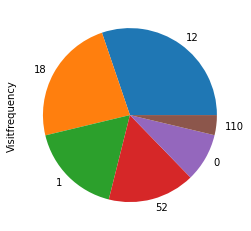

In [155]:
mcdonald_df.Visitfrequency.value_counts().plot.pie()

<AxesSubplot:ylabel='Gender'>

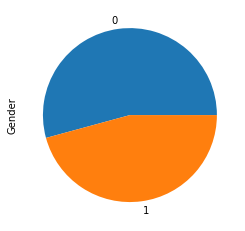

In [156]:
mcdonald_df.Gender.value_counts().plot.pie()

<AxesSubplot:ylabel='Age'>

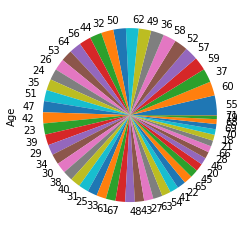

In [157]:
mcdonald_df.Age.value_counts().plot.pie()

<AxesSubplot:ylabel='Like'>

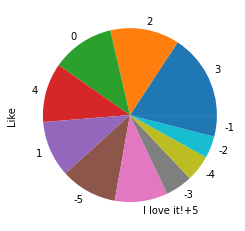

In [158]:
mcdonald_df.Like.value_counts().plot.pie()

<AxesSubplot:>

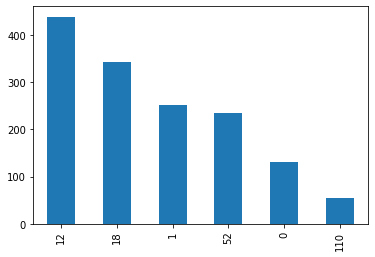

In [159]:
mcdonald_df.Visitfrequency.value_counts().plot.bar()

<AxesSubplot:>

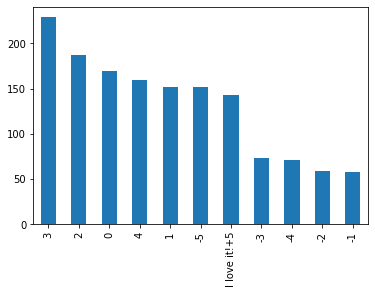

In [160]:
mcdonald_df.Like.value_counts().plot.bar()

<AxesSubplot:>

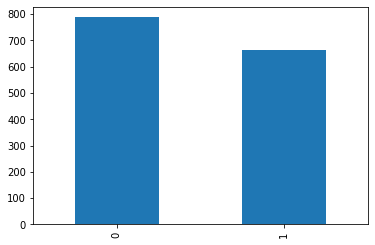

In [161]:
mcdonald_df.Gender.value_counts().plot.bar()

In [162]:
mcdonald_df.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender,Visitfrequency
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.281653,-0.062545,0.342253
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.070597,-0.041402,0.177322
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.146217,0.051015,0.018397
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.139254,-0.059707,-0.084651
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,-0.233554,0.021801,-0.098484
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.020558,-0.049027,0.041233
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,0.016958,-0.116050,0.070131
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.194576,-0.044385,0.291098
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,-0.070851,0.144113,-0.015887
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,0.021366,-0.042455,0.159824


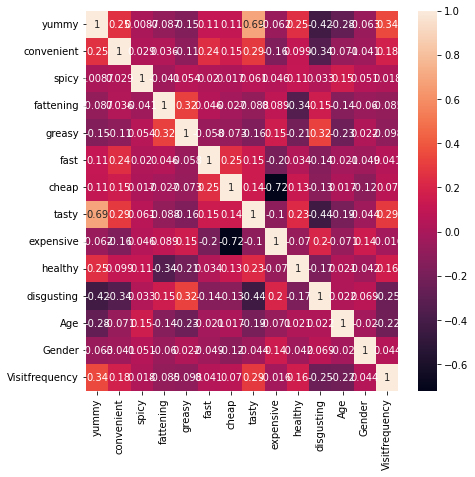

In [164]:
plt.figure(figsize=(7,7))
sns.heatmap(mcdonald_df.corr(), annot=True)
plt.show()

In [168]:
mcdonald_df.tail(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,Visitfrequency
1443,1,1,0,1,0,1,1,1,0,0,0,2,50,0,1
1444,0,1,0,1,1,1,1,0,0,1,0,-3,55,1,0
1445,0,1,0,1,1,1,1,1,0,0,1,1,18,0,12
1446,1,1,0,1,1,1,1,1,0,1,0,1,52,0,18
1447,0,1,0,1,1,0,0,1,1,0,0,0,43,1,12
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,0,52
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0,12
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1,18
1452,0,1,0,1,1,0,0,0,1,0,1,-3,30,1,18


In [169]:
del mcdonald_df['Visitfrequency']
mcdonald_df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1


In [181]:

del mcdonald_df['like']
mcdonald_df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender
0,0,1,0,1,0,1,1,0,1,0,0,61,0
1,1,1,0,1,1,1,1,1,1,0,0,51,0
2,0,1,1,1,1,1,0,1,1,1,0,62,0
3,1,1,0,1,1,1,1,1,0,0,1,69,0
4,0,1,0,1,1,1,1,0,0,1,0,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,47,1
1449,1,1,0,1,0,0,1,1,0,1,0,36,0
1450,1,1,0,1,0,1,0,1,1,0,0,52,0
1451,1,1,0,0,0,1,1,1,0,1,0,41,1


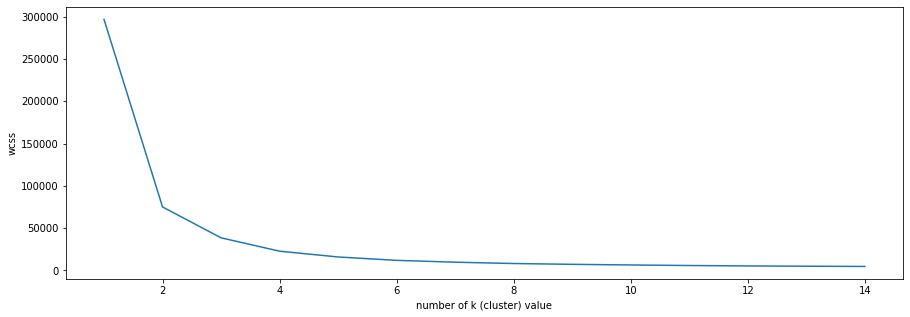

In [184]:
wcss = []
data_model = mcdonald_df
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

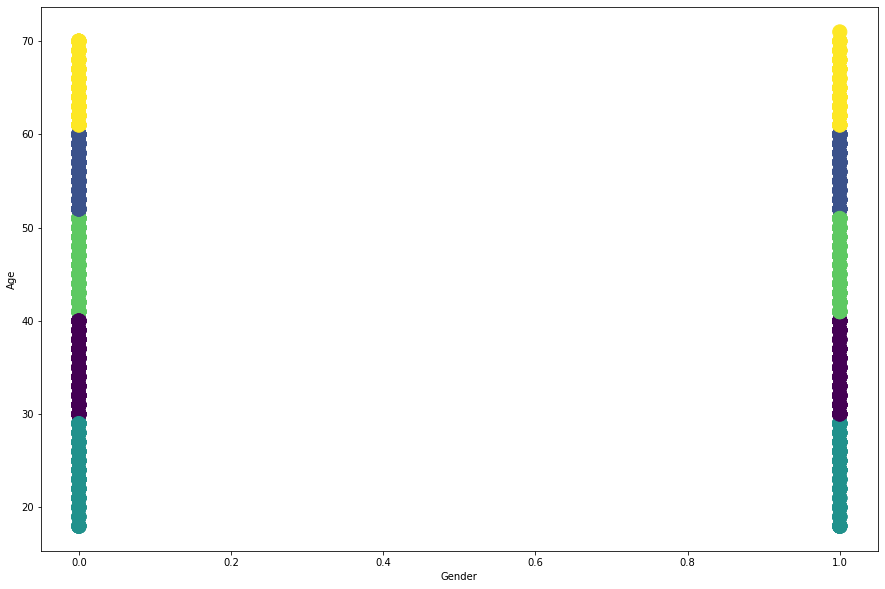

In [185]:
kmeans = KMeans(n_clusters=5)
data_predict = kmeans.fit_predict(data_model)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Gender' ,y = 'Age' , data = data_model , c = data_predict , s = 200 )
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

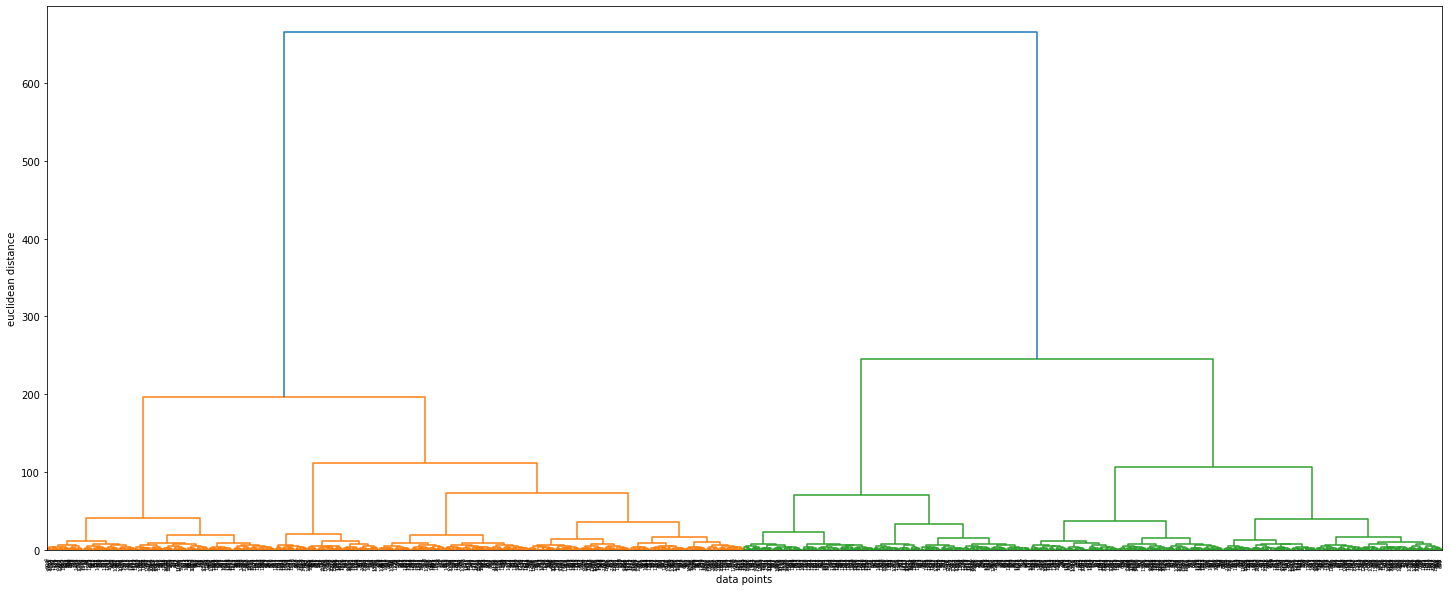

In [186]:
merg = linkage(data_model,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

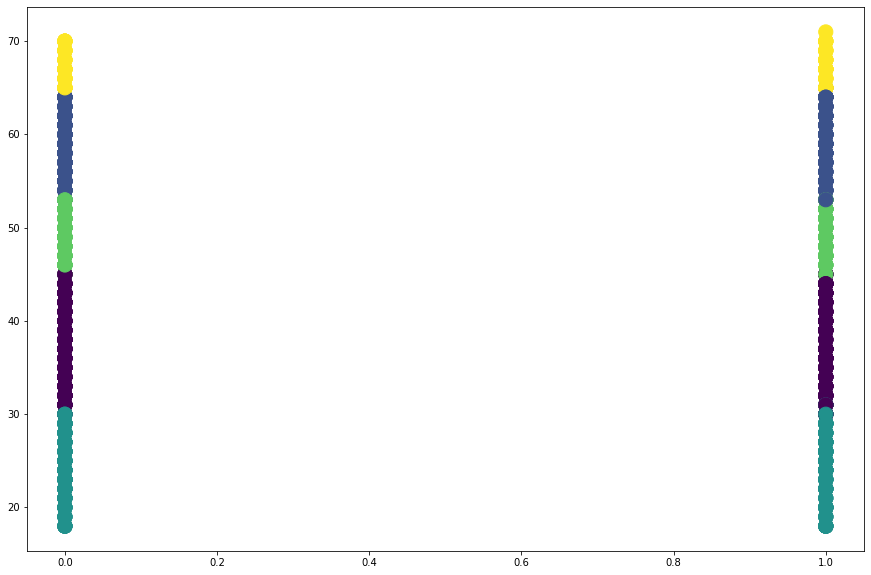

In [187]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(data_model)
plt.figure(figsize=(15,10))
plt.scatter( x = 'Gender' ,y = 'Age' , data = data_model , c = data_predict , s = 200 )
plt.show()